# Question1 
Based on this data, what can we conclude at this point from the A/B test (in which we tried initiating the background check earlier in the hiring process for the treatment shoppers)? And how confident should we be in this conclusion?

In [2]:
# import package
import pandas as pd

In [3]:
# read file
df = pd.read_csv('application.csv')

# check dataset
df.head()

,applicant_id,channel,group,city,event,event_date
0,10001,web-search-engine,control,Asgard,application_date,2018-10-01
1,10002,social-media,control,Midgard,application_date,2018-10-01
2,10003,web-search-engine,treatment,Midgard,application_date,2018-10-01
3,10004,social-media,treatment,Asgard,application_date,2018-10-01
4,10005,social-media,treatment,Midgard,application_date,2018-10-01


In [4]:
# check data type
print(df.dtypes)

applicant_id     int64
channel         object
group           object
city            object
event           object
event_date      object
dtype: object


In [5]:
# change data type
df['applicant_id'] = df['applicant_id'].astype('object')
df['event_date'] = df['event_date'].astype('datetime64')

In [6]:
df.head()

,applicant_id,channel,group,city,event,event_date
0,10001,web-search-engine,control,Asgard,application_date,2018-10-01
1,10002,social-media,control,Midgard,application_date,2018-10-01
2,10003,web-search-engine,treatment,Midgard,application_date,2018-10-01
3,10004,social-media,treatment,Asgard,application_date,2018-10-01
4,10005,social-media,treatment,Midgard,application_date,2018-10-01


In [7]:
# # explore dataset
# df.describe(include='all')

In [8]:
# check unique sample size
df.groupby('group').agg({'applicant_id': 'nunique'})

,applicant_id
group,
control,14501
treatment,7197


In [9]:
# check event size
df.groupby('group').agg({'applicant_id': 'count'})

,applicant_id
group,
control,68750
treatment,39578


In [10]:
# check control group conversion funnel and its sequence by group
df[df['group']=='control'].groupby(['group','event']).applicant_id.nunique().sort_values(ascending=False)

group    event                          
control  application_date                   14501
         card_mailed_date                   14266
         background_check_initiated_date    10836
         card_activation_date               10836
         background_check_completed_date     9456
         orientation_completed_date          5982
         first_batch_completed_date          2873
Name: applicant_id, dtype: int64

In [11]:
# check treatment group conversion funnel and its sequence by group
df[df['group']=='treatment'].groupby(['group','event']).applicant_id.nunique().sort_values(ascending=False)

group      event                          
treatment  application_date                   7197
           background_check_initiated_date    7197
           card_mailed_date                   7071
           background_check_completed_date    6384
           card_activation_date               5889
           orientation_completed_date         3369
           first_batch_completed_date         2471
Name: applicant_id, dtype: int64

In [12]:
# calculating conversion rate
# nominator
cvr_nom = pd.DataFrame(df.groupby(['group','event']).applicant_id.nunique().sort_values(ascending=False))
cvr_nom = cvr_nom.sort_values(['group','applicant_id'],ascending=False).reset_index()

# denominator - number of applicants who enter the process in each of control and treatment group
cvr_denom = pd.DataFrame(cvr_nom.groupby('group').applicant_id.max()).reset_index()

# rate
cvr = cvr_nom.merge(cvr_denom, left_on='group', right_on='group').reset_index(drop=True)
cvr['rate'] = cvr['applicant_id_x']/cvr['applicant_id_y']
cvr

,group,event,applicant_id_x,applicant_id_y,rate
0,treatment,application_date,7197,7197,1.000000
1,treatment,background_check_initiated_date,7197,7197,1.000000
2,treatment,card_mailed_date,7071,7197,0.982493
3,treatment,background_check_completed_date,6384,7197,0.887036
4,treatment,card_activation_date,5889,7197,0.818258
5,treatment,orientation_completed_date,3369,7197,0.468112
6,treatment,first_batch_completed_date,2471,7197,0.343338
7,control,application_date,14501,14501,1.000000
8,control,card_mailed_date,14266,14501,0.983794
9,control,background_check_initiated_date,10836,14501,0.747259


In [13]:
# check experiment duration
print(df['event_date'].min())
print(df['event_date'].max())
df['event_date'].max() - df['event_date'].min()

2018-10-01 00:00:00
2018-11-11 00:00:00


Timedelta('41 days 00:00:00')

In [14]:
# transpose the dataset by applicant
df_transpose = df.pivot_table(index=['group','applicant_id'], columns='event', values='event_date', aggfunc='max')
df_transpose.reset_index()

event,group,applicant_id,application_date,background_check_completed_date,background_check_initiated_date,card_activation_date,card_mailed_date,first_batch_completed_date,orientation_completed_date
0,control,10001,2018-10-01,NaT,NaT,NaT,2018-10-01,NaT,2018-10-03
1,control,10002,2018-10-01,2018-10-17,2018-10-12,2018-10-12,2018-10-01,2018-10-20,NaT
2,control,10006,2018-10-01,NaT,NaT,NaT,2018-10-01,NaT,NaT
3,control,10007,2018-10-01,2018-10-11,2018-10-07,2018-10-07,2018-10-02,2018-10-14,NaT
4,control,10008,2018-10-01,NaT,NaT,NaT,2018-10-02,NaT,NaT
...,...,...,...,...,...,...,...,...,...
21693,treatment,31684,2018-11-11,NaT,2018-11-11,NaT,2018-11-11,NaT,NaT
21694,treatment,31686,2018-11-11,NaT,2018-11-11,NaT,2018-11-11,NaT,NaT
21695,treatment,31687,2018-11-11,NaT,2018-11-11,NaT,2018-11-11,NaT,NaT
21696,treatment,31689,2018-11-11,NaT,2018-11-11,NaT,2018-11-11,NaT,NaT


/Users/sherry/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

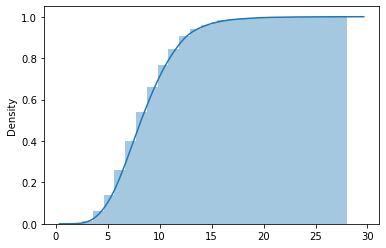

In [15]:
# what's the distribution of the duration of the days between application_date and first_batch_completed_date
import seaborn as sns
duration = df_transpose['first_batch_completed_date'] - df_transpose['application_date']
sns.distplot(duration[duration.notna()].dt.days, hist_kws={'cumulative':'True'}, kde_kws={'cumulative':'True'})

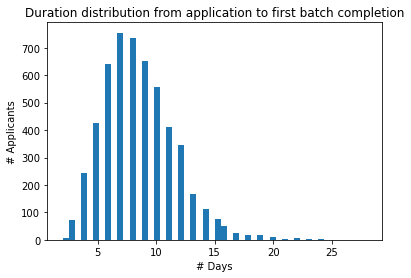

In [16]:
# Plot Histogram on the duration from the application date to the first batch completion date
import matplotlib.pyplot as plt
x = duration[duration.notna()].dt.days
plt.hist(x, bins=50)
plt.gca().set(title='Duration distribution from application to first batch completion', xlabel = '# Days', ylabel='# Applicants');

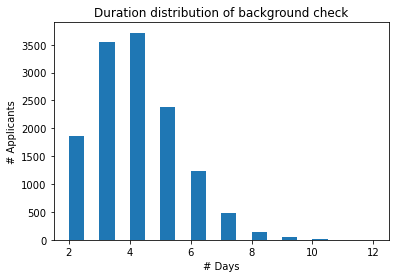

In [42]:
# Plot Histogram on the duration of the background check
import matplotlib.pyplot as plt
background_duration = df_transpose['background_check_completed_date'] - df_transpose['background_check_initiated_date']
x = background_duration[background_duration.notna()].dt.days
plt.hist(x, bins=20)
plt.gca().set(title='Duration distribution of background check', xlabel = '# Days', ylabel='# Applicants');

## Sample Size

In [18]:
# define the conversion window
# application date range from [2018-10-01 00:00:00, 2018-10-31 00:00:00] 80%

qualified_applicant_id = pd.DataFrame(df.loc[(df['event'] == 'application_date') & (df['event_date'] <= '2018-10-31'),'applicant_id'].unique())
qualified_applicant_id.columns = ['qualified_applicant_id']
qualified_applicant_id

,qualified_applicant_id
0,10001
1,10002
2,10003
3,10004
4,10005
...,...
14977,24978
14978,24979
14979,24980
14980,24981


In [19]:
# filter out unqualified applicants
df = df.merge(qualified_applicant_id, left_on='applicant_id', right_on='qualified_applicant_id', how='inner').reset_index(drop=True)
df = df[['applicant_id','channel','group','city','event','event_date']]
df.head()

,applicant_id,channel,group,city,event,event_date
0,10001,web-search-engine,control,Asgard,application_date,2018-10-01
1,10001,web-search-engine,control,Asgard,card_mailed_date,2018-10-01
2,10001,web-search-engine,control,Asgard,orientation_completed_date,2018-10-03
3,10002,social-media,control,Midgard,application_date,2018-10-01
4,10002,social-media,control,Midgard,card_mailed_date,2018-10-01


In [20]:
# check conversion funnel
print(df[df['group'] == 'control'].groupby(['group','event']).applicant_id.nunique().sort_values(ascending=False))
print(df[df['group'] == 'treatment'].groupby(['group','event']).applicant_id.nunique().sort_values(ascending=False))

group    event                          
control  application_date                   10024
         card_mailed_date                   10024
         background_check_initiated_date     8582
         card_activation_date                8582
         background_check_completed_date     8465
         orientation_completed_date          4370
         first_batch_completed_date          2678
Name: applicant_id, dtype: int64
group      event                          
treatment  application_date                   4958
           background_check_completed_date    4958
           background_check_initiated_date    4958
           card_mailed_date                   4958
           card_activation_date               4658
           orientation_completed_date         2545
           first_batch_completed_date         2115
Name: applicant_id, dtype: int64


In [21]:
# check overall conversion funnel by event
print(df.groupby(['event']).applicant_id.nunique().sort_values(ascending=False))

event
application_date                   14982
card_mailed_date                   14982
background_check_initiated_date    13540
background_check_completed_date    13423
card_activation_date               13240
orientation_completed_date          6915
first_batch_completed_date          4793
Name: applicant_id, dtype: int64


In [22]:
# check channel distribution
print(df.groupby(['channel']).applicant_id.nunique().sort_values(ascending=False))

channel
web-search-engine         5939
social-media              4427
job-search-site           2625
shopper-referral-bonus    1991
Name: applicant_id, dtype: int64


In [23]:
# check city distribution
print(df.groupby(['city']).applicant_id.nunique().sort_values(ascending=False))

city
Midgard         6892
Asgard          4735
Alfheim         1266
Vanaheim         983
Niflheim         565
Jotunheim        221
Muspelheim       112
Helheim          106
Svartalfheim     102
Name: applicant_id, dtype: int64


## Checking the invariate metrics

### Sample size (function)

In [24]:
# sanity check --> sample size
# define invariate check function
# assume p_pool is 0.5 because it gives the largest p(1-p) value

def invariant_check (test_sample_size, control_sample_size, p_pool, z_score):
    import numpy as np
    p_pool_sd = np.sqrt(p_pool * (1-p_pool) / (test_sample_size + control_sample_size))
    margin_error = z_score * p_pool_sd
    control_prop = control_sample_size / (control_sample_size + test_sample_size)
    confidence_interval_lower = p_pool - margin_error
    confidence_interval_upper = p_pool + margin_error
    return confidence_interval_lower, confidence_interval_upper, control_prop

test_sample = df.groupby('group').agg({'applicant_id':'nunique'}).loc['treatment','applicant_id']
control_sample = df.groupby('group').agg({'applicant_id':'nunique'}).loc['control','applicant_id']
lower, upper, control_prop = invariant_check(test_sample, control_sample, 0.5, 1.96)

print('confidence interval lower bounds: ', lower)
print('confidence interval upper bounds: ', upper)
print('control proportion: ', control_prop)

confidence interval lower bounds:  0.4919935281817871
confidence interval upper bounds:  0.5080064718182129
control proportion:  0.6690695501268189


In [25]:
#if (control_prop >= lower) and (control_prop <= upper):
#    print ('Pass')
#else:
#    print ('Fail')

## Checking the evaluation metric

In [26]:
import scipy.stats as stats

# choose metric
# conversion rate = complete first batch / total application
# calculate z score

# define z_score function
def z_score_pool(test_success, control_success, test_sample_size, control_sample_size):
    import numpy as np
    distance = test_success/test_sample_size - control_success/control_sample_size
    p_pool = (test_success+control_success)/(test_sample_size+control_sample_size)
    p_pool_sd = np.sqrt(p_pool*(1-p_pool)*(1/test_sample_size+1/control_sample_size))
    z_score = (distance-0)/p_pool_sd
    return z_score

test_complete = 2115
control_complete = 2678
test_sample_size = 4958
control_sample_size = 10024
alpha = 0.05

z = z_score_pool(test_complete, control_complete, test_sample_size, control_sample_size)
print ( 'z score is %s > 1.65, so we can reject null hypothesis, and accept alternative hypothesis' %z )

z score is 19.685398121466985 > 1.65, so we can reject null hypothesis, and accept alternative hypothesis


In [27]:
# calculate the duration from the application date to the first batch completed

df_transpose = df.pivot_table(index=['group','channel','applicant_id'], columns='event', values='event_date', aggfunc='max')
df_transpose['duration1'] = (df_transpose['first_batch_completed_date'] - df_transpose['application_date']).dt.days
df_transpose = df_transpose.reset_index()
df_transpose

# days from the application to the first batch completed
df_transpose.groupby(['group']).agg({'duration1':'mean'})

,duration1
group,
control,10.176251
treatment,7.076123


In [28]:
# days from the application to the first batch completed by channel
df_transpose.groupby(['group','channel']).agg({'duration1':'mean'})

duration1
group     channel                          
control   job-search-site          9.505376
          shopper-referral-bonus   9.465324
          social-media            11.250522
          web-search-engine        9.648893
treatment job-search-site          6.317901
          shopper-referral-bonus   6.927492
          social-media             7.992780
          web-search-engine        6.841060

In [29]:
# for the control group, duration from the application date to completing both the card activation and the background check 

df_transpose['duration2'] = (df_transpose['first_batch_completed_date'] - df_transpose['background_check_completed_date']).dt.days
df_transpose.groupby('group').agg({'duration2':'mean'}).loc['control']

duration2    1.95295
Name: control, dtype: float64

In [30]:
# for the control group, duration from the application date to completing both the card activation and the background check by channel

df_transpose['duration2'] = (df_transpose['first_batch_completed_date'] - df_transpose['background_check_completed_date']).dt.days
df_transpose.groupby(['group','channel']).agg({'duration2':'mean'}).loc['control']

,duration2
channel,
job-search-site,2.086022
shopper-referral-bonus,1.816555
social-media,1.983299
web-search-engine,1.947686


In [31]:
# for the test group, duration from the application date to completing both the card activation and the background check 

df_transpose['duration3'] = (df_transpose['first_batch_completed_date'] - df_transpose['card_activation_date']).dt.days
df_transpose.groupby('group').agg({'duration3':'mean'}).loc['treatment']

duration3    2.54279
Name: treatment, dtype: float64

In [32]:
# for the test group, duration from the application date to completing both the card activation and the background check by channel

df_transpose['duration3'] = (df_transpose['first_batch_completed_date'] - df_transpose['card_activation_date']).dt.days
df_transpose.groupby(['group','channel']).agg({'duration3':'mean'}).loc['treatment']

,duration3
channel,
job-search-site,2.364198
shopper-referral-bonus,2.891239
social-media,2.460289
web-search-engine,2.529801


## Question 2

- the background check costs us $30 to complete
- we'd like to know if this change is cost-effective

In [33]:
cost = 30

# formula per success

control = (30*8582)/2678
test = (30*4958)/2115
print(control)
print(test)

96.13890963405527
70.32624113475177


In [34]:
# calculating card activation rate and orientation rate for control group
print(df[df['group'] == 'control'].groupby(['group','channel','event']).applicant_id.nunique())
job_search_site_activation_rate_control = 1183/1765
shopper_referral_bonus_activation_rate_control = 1279/1332
social_media_activation_rate_control = 2868/2998
web_search_engine_activation_rate_control = 3252/3929

print('job search site card activation rate: ', job_search_site_activation_rate_control)
print('shopper referral bonus card activation rate: ', shopper_referral_bonus_activation_rate_control)
print('social media card activation rate: ', social_media_activation_rate_control)
print('web search engine card activation rate: ', web_search_engine_activation_rate_control)

job_search_site_orientation_rate_control = 864/1765
shopper_referral_bonus_orientation_rate_control = 1101/1332
social_media_orientation_rate_control = 511/2998
web_search_engine_orientation_rate_control = 1894/3929

print('job search site orientation rate: ', job_search_site_orientation_rate_control)
print('shopper referral bonus orientation rate: ', shopper_referral_bonus_orientation_rate_control)
print('social media orientation rate: ', social_media_orientation_rate_control)
print('web search engine orientation rate: ', web_search_engine_orientation_rate_control)

group    channel                 event                          
control  job-search-site         application_date                   1765
                                 background_check_completed_date    1181
                                 background_check_initiated_date    1183
                                 card_activation_date               1183
                                 card_mailed_date                   1765
                                 first_batch_completed_date          279
                                 orientation_completed_date          864
         shopper-referral-bonus  application_date                   1332
                                 background_check_completed_date    1260
                                 background_check_initiated_date    1279
                                 card_activation_date               1279
                                 card_mailed_date                   1332
                                 first_batch_completed_date

In [35]:
# calculating card activation rate and orientation rate for test group
print(df[df['group'] == 'treatment'].groupby(['group','channel','event']).applicant_id.nunique())
job_search_site_activation_rate_test = 747/860
shopper_referral_bonus_activation_rate_test = 636/659
social_media_activation_rate_test = 1394/1429
web_search_engine_activation_rate_test = 1881/2010

print('job search site card activation rate: ', job_search_site_activation_rate_test)
print('shopper referral bonus card activation rate: ', shopper_referral_bonus_activation_rate_test)
print('social media card activation rate: ', social_media_activation_rate_test)
print('web search engine card activation rate: ', web_search_engine_activation_rate_test)

job_search_site_orientation_rate_test = 509/860
shopper_referral_bonus_orientation_rate_test = 540/659
social_media_orientation_rate_test = 286/1429
web_search_engine_orientation_rate_test = 1210/2010

print('job search site orientation rate: ', job_search_site_orientation_rate_test)
print('shopper referral bonus orientation rate: ', shopper_referral_bonus_orientation_rate_test)
print('social media orientation rate: ', social_media_orientation_rate_test)
print('web search engine orientation rate: ', web_search_engine_orientation_rate_test)

group      channel                 event                          
treatment  job-search-site         application_date                    860
                                   background_check_completed_date     860
                                   background_check_initiated_date     860
                                   card_activation_date                747
                                   card_mailed_date                    860
                                   first_batch_completed_date          324
                                   orientation_completed_date          509
           shopper-referral-bonus  application_date                    659
                                   background_check_completed_date     659
                                   background_check_initiated_date     659
                                   card_activation_date                636
                                   card_mailed_date                    659
                                 

In [36]:
# calculating z-score for the significance of the card activation rate increase
import numpy as np

job_search_site_d = 0.8686046511627907-0.6702549575070822
job_search_site_p_pool = (747+1183)/(860+1765)
job_search_site_z_score = (job_search_site_d-0)/np.sqrt(job_search_site_p_pool*(1-job_search_site_p_pool)*(1/860+1/1765))
job_search_site_z_score

10.81052316208037

In [37]:
shopper_referral_bonus_d = 0.9650986342943855-0.9602102102102102
shopper_referral_bonus_p_pool = (636+1279)/(659+1332)
shopper_referral_bonus_z_score = (shopper_referral_bonus_d-0)/np.sqrt(shopper_referral_bonus_p_pool*(1-shopper_referral_bonus_p_pool)*(1/659+1/1332))
shopper_referral_bonus_z_score

0.5356833396499161

In [38]:
social_media_d = 0.9755073477956613-0.9566377585056705
social_media_p_pool = (1394+2868)/(1429+2998)
social_media_z_score = (social_media_d-0)/np.sqrt(social_media_p_pool*(1-social_media_p_pool)*(1/1429+1/2998))
social_media_z_score

3.098849198588652

In [39]:
web_search_engine_d = 0.935820895522388-0.827691524560957
web_search_engine_p_pool = (3252+1881)/(3929+2010)
web_search_engine_z_score = (web_search_engine_d-0)/np.sqrt(web_search_engine_p_pool*(1-web_search_engine_p_pool)*(1/3929+1/2010))
web_search_engine_z_score

11.51293967915745

## Question 3

In [40]:
# calculate channel conversion rate

channel_cvr = df_transpose.groupby('channel').agg({'application_date':'count', 'first_batch_completed_date':'count'})
channel_cvr['cvr'] = channel_cvr['first_batch_completed_date']/channel_cvr['application_date']
channel_cvr.head()

,application_date,first_batch_completed_date,cvr
channel,,,
job-search-site,2625,603,0.229714
shopper-referral-bonus,1991,778,0.390758
social-media,4427,1512,0.341541
web-search-engine,5939,1900,0.319919


In [41]:
# calculate channel conversion rate by control and test group

channel_cvr_group = df_transpose.groupby(['group','channel']).agg({'application_date':'count', 'first_batch_completed_date':'count'})
channel_cvr_group['cvr'] = channel_cvr_group['first_batch_completed_date']/channel_cvr_group['application_date']
channel_cvr_group

application_date  \
group     channel                                    
control   job-search-site                     1765   
          shopper-referral-bonus              1332   
          social-media                        2998   
          web-search-engine                   3929   
treatment job-search-site                      860   
          shopper-referral-bonus               659   
          social-media                        1429   
          web-search-engine                   2010   

                                  first_batch_completed_date       cvr  
group     channel                                                       
control   job-search-site                                279  0.158074  
          shopper-referral-bonus                         447  0.335586  
          social-media                                   958  0.319546  
          web-search-engine                              994  0.252991  
treatment job-search-site                                324  0.376744  
          shopper-referral-bonus                         331  0.502276  
          social-media                                   554  0.387684  
          web-search-engine                              906  0.450746